<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/Regression/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%B0%D1%8F_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%BE%D0%B1%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%B0_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2_%D1%87%D0%B5%D1%80%D0%B5%D0%B7_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D0%BE%D0%B1%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📌 Глава: Простая линейная регрессия и метод наименьших квадратов

## Введение

Линейная регрессия является фундаментальным инструментом статистического анализа и машинного обучения. Она решает одну из базовых задач: как на основе одного явления (независимой переменной) предсказать другое (зависимую переменную), предполагая, что связь между ними имеет линейный характер. В этой главе мы не просто выведем формулы для расчёта коэффициентов регрессии, но и заложим прочный теоретический фундамент, ответив на ключевой вопрос: *почему* мы минимизируем именно сумму квадратов ошибок? Ответ, как мы увидим, лежит в области теории вероятностей и ведёт нас к одному из важнейших принципов статистического оценивания — методу максимального правдоподобия.

---

## 1. Постановка задачи и линейная модель

Рассмотрим задачу моделирования зависимости целевой переменной $ y $ от одного независимого признака $ x_1 $. Пусть у нас имеется набор наблюдений, и мы подозреваем, что зависимость между этими переменными является линейной. Это означает, что мы можем описать её следующим уравнением:

$$
y = w_0 + w_1 x_1 + \varepsilon,
$$

где:
- $ y $ — зависимая переменная (target), которую мы пытаемся предсказать;
- $ x_1 $ — независимая переменная (признак, feature), на основе которой мы строим прогноз;
- $ w_0 $ — свободный член (bias, intercept). Геометрически это точка пересечения прямой с осью ординат $y$;
- $ w_1 $ — коэффициент наклона (slope). Он показывает, на сколько единиц в среднем изменится $ y $ при изменении $ x_1 $ на одну единицу;
- $ \varepsilon $ — случайный шум или ошибка наблюдения.

Важно понимать, что мы не предполагаем жёсткой детерминированной связи $ y = w_0 + w_1 x_1 $. Напротив, мы признаём, что в реальных данных всегда присутствуют случайные факторы, которые наша линейная модель не может учесть идеально. Это могут быть погрешности измерений, влияние неучтённых переменных или чисто случайные флуктуации. Именно для учёта этих факторов и вводится случайная ошибка $\varepsilon$.

**Целью исследования** является **оценивание неизвестных параметров** $ w_0 $ и $ w_1 $ по имеющимся данным таким образом, чтобы минимизировать отклонение предсказанных нашей моделью значений от реально наблюдаемых данных.

---


Для наглядного понимания задачи, взгляните на Рисунок 1. На нем синими точками показаны гипотетические наблюдения $(x^{(i)}, y^{(i)})$. Красная прямая — это модель $\hat{y} = w_0 + w_1 x$, которую мы хотим построить. Серые пунктирные отрезки — это ошибки модели $\varepsilon^{(i)} = y^{(i)} - \hat{y}^{(i)}$, показывающие, насколько каждое предсказание отклоняется от реального значения. Метод наименьших квадратов стремится минимизировать сумму квадратов длин этих отрезков.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Устанавливаем красивый стиль для графиков (опционально)
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================================
# Рисунок 1: Точки данных, линия регрессии и ошибки (остатки)
# ============================================================

# 1. Генерируем синтетические данные
np.random.seed(42)  # для воспроизводимости
n_points = 15
x = np.linspace(0, 10, n_points)
# Истинная зависимость: y = 2 + 3x + шум
true_w0, true_w1 = 2, 3
y = true_w0 + true_w1 * x + np.random.normal(0, 3, n_points)

# 2. Строим модель линейной регрессии (аналитическое решение)
x_mean = np.mean(x)
y_mean = np.mean(y)
# Вычисляем w1 и w0 по формулам из раздела 5
w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
w0 = y_mean - w1 * x_mean

# 3. Создаем фигуру
fig1, ax1 = plt.subplots(figsize=(10, 6))

# 4. Рисуем точки данных
ax1.scatter(x, y, color='blue', s=80, label='Наблюдения $(x^{(i)}, y^{(i)})$', zorder=5)

# 5. Рисуем линию регрессии
x_line = np.linspace(-0.5, 10.5, 100)
y_line = w0 + w1 * x_line
ax1.plot(x_line, y_line, color='red', linewidth=3, label=f'Модель: $\hat{{y}} = {w0:.2f} + {w1:.2f}x$', zorder=4)

# 6. Рисуем ошибки (остатки) как вертикальные отрезки
y_pred = w0 + w1 * x
for i in range(n_points):
    ax1.plot([x[i], x[i]], [y[i], y_pred[i]], color='gray', linestyle='--', linewidth=1, zorder=1)

# 7. Добавляем аннотацию для одной из ошибок
ax1.annotate('', xy=(x[5], y[5]), xytext=(x[5], y_pred[5]),
             arrowprops=dict(arrowstyle='<->', color='black', lw=1.5))
ax1.text(x[5] + 0.2, (y[5] + y_pred[5]) / 2, r'$\varepsilon^{(i)} = y^{(i)} - \hat{y}^{(i)}$',
         fontsize=12, verticalalignment='center')

# 8. Оформление графика
ax1.set_xlabel('$x$ (независимый признак)', fontsize=14)
ax1.set_ylabel('$y$ (целевая переменная)', fontsize=14)
ax1.set_title('Рисунок 1: Иллюстрация линейной регрессии и ошибок модели', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([-0.5, 10.5])
ax1.set_ylim([-5, 40])

# Сохраняем рисунок
plt.tight_layout()
plt.savefig('linear_regression_fig1.png', dpi=150)
print("Рисунок 1 сохранен как 'linear_regression_fig1.png'")


# ============================================================
# Рисунок 2: Условное распределение y|x (нормальное распределение вокруг прямой)
# ============================================================

# 1. Используем ту же модель, но для наглядности возьмем три точки
x_centers = [2, 5, 8]
y_centers = [w0 + w1 * xc for xc in x_centers]
sigma = 3  # стандартное отклонение ошибки

# 2. Создаем фигуру
fig2, ax2 = plt.subplots(figsize=(12, 6))

# 3. Рисуем базовую линию регрессии
x_line2 = np.linspace(-0.5, 10.5, 100)
y_line2 = w0 + w1 * x_line2
ax2.plot(x_line2, y_line2, color='red', linewidth=3, label=f'Линия регрессии $E[y|x] = {w0:.2f} + {w1:.2f}x$', zorder=3)

# 4. Для каждой точки рисуем колоколообразное распределение
colors = ['green', 'purple', 'orange']
for i, (xc, yc) in enumerate(zip(x_centers, y_centers)):
    # Генерируем точки для графика плотности нормального распределения
    y_dist = np.linspace(yc - 3*sigma, yc + 3*sigma, 200)
    # Плотность вероятности (масштабируем для наглядности)
    pdf = norm.pdf(y_dist, yc, sigma)
    # Нормируем, чтобы колокол был виден на графике (ширина колокола пропорциональна плотности)
    scaled_pdf = pdf / np.max(pdf) * 1.5  # масштабируем, чтобы не закрывал линию

    # Рисуем "колокол" горизонтально
    ax2.plot(xc + scaled_pdf, y_dist, color=colors[i], linewidth=2, linestyle='-', alpha=0.7)
    ax2.fill_betweenx(y_dist, xc, xc + scaled_pdf, color=colors[i], alpha=0.2)

    # Рисуем точку на линии регрессии (центр распределения)
    ax2.scatter([xc], [yc], color=colors[i], s=100, zorder=5, edgecolors='black')

    # Добавляем аннотацию
    ax2.annotate(f'$x = {xc}$', xy=(xc + 0.2, yc + 2), fontsize=10, color=colors[i])

# 5. Оформление
ax2.set_xlabel('$x$ (независимый признак)', fontsize=14)
ax2.set_ylabel('$y$ (целевая переменная)', fontsize=14)
ax2.set_title('Рисунок 2: Условное распределение $y|x$ (нормальное распределение ошибок)', fontsize=16, fontweight='bold')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([-1, 11])
ax2.set_ylim([-5, 40])

# Добавим поясняющий текст
ax2.text(0.5, 35, 'Для каждого $x$ значения $y$ распределены нормально\nс центром на линии регрессии',
         fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Сохраняем рисунок
plt.tight_layout()
plt.savefig('linear_regression_fig2.png', dpi=150)
print("Рисунок 2 сохранен как 'linear_regression_fig2.png'")

# Показываем графики (если запускаете в интерактивной среде)
plt.show()

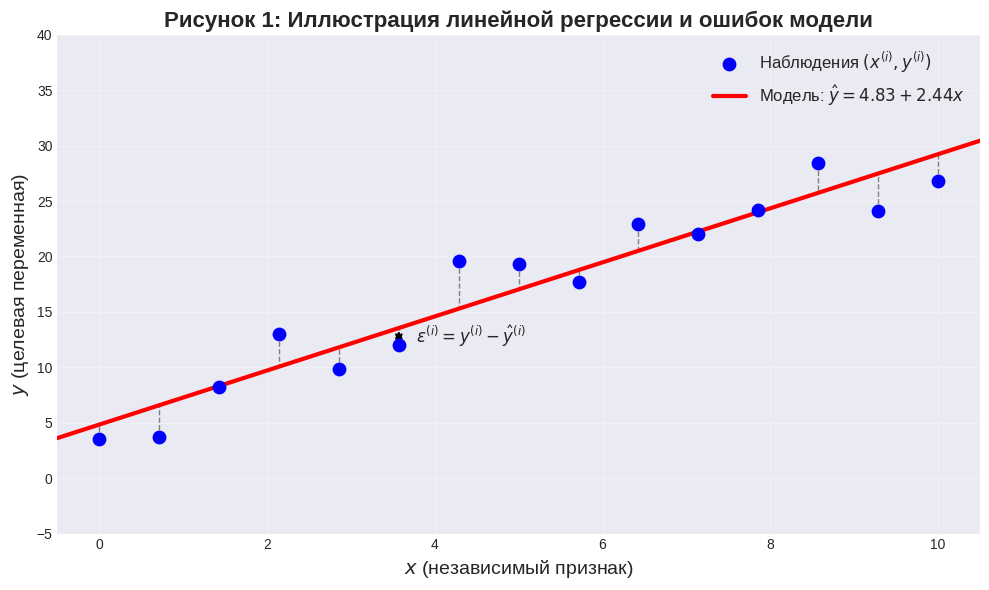


*Рисунок 1 — Точки данных, линия регрессии и ошибки (остатки) модели.*




## 2. Вероятностная интерпретация ошибки: почему нормальное распределение?

Для того чтобы перейти от интуитивного желания "минимизировать отклонения" к строгому статистическому обоснованию, нам необходимо ввести вероятностную модель поведения ошибки. Это ключевой шаг, который превращает регрессионный анализ в статистический метод.

Будем предполагать, что случайная ошибка $ \varepsilon $ подчиняется **нормальному закону распределения (Гаусса)** с нулевым математическим ожиданием и постоянной дисперсией $ \sigma^2 > 0 $:

$$
\varepsilon \sim \mathcal{N}(0, \sigma^2).
$$

Запись читается как "эпсилон распределена нормально с параметрами 0 и сигма-квадрат". Давайте разберём, что означает каждое из этих предположений и почему они так важны.

### Что значит "случайная ошибка имеет нормальное распределение"?

Это центральное предположение всей классической линейной регрессии. Оно опирается на **центральную предельную теорему (ЦПТ)**. ЦПТ утверждает, что сумма большого числа независимых и одинаково распределённых случайных величин (каждая из которых вносит малый вклад) стремится к нормальному распределению. В контексте нашей модели это означает, что ошибка $\varepsilon$ представляет собой суммарный эффект множества мелких, независимых и неучтённых факторов. Например, при прогнозировании цены дома ($y$) по его площади ($x_1$) ошибка может возникать из-за состояния отделки, этажа, времени продажи, настроения покупателя и тысяч других мелких причин. ЦПТ как раз и говорит нам, что суммарный эффект всех этих причин будет иметь распределение, близкое к нормальному.

### Что значит "с нулевым математическим ожиданием" ($\mathbb{E}[\varepsilon] = 0$)?

Это предположение означает, что в среднем наша модель не ошибается систематически. Мы не завышаем и не занижаем прогнозы постоянно. Положительные и отрицательные ошибки в среднем уравновешивают друг друга. Если бы это было не так (например, $\mathbb{E}[\varepsilon] = c \neq 0$), то это означало бы, что мы неправильно специфицировали модель, и константу $c$ следовало бы включить в свободный член $w_0$. Таким образом, условие нулевого среднего гарантирует несмещённость наших прогнозов в среднем.

### Что значит "с постоянной дисперсией" ($\mathbb{D}[\varepsilon] = \sigma^2$)?

Это свойство называется **гомоскедастичностью** (от греческого "homos" — равный и "skedasis" — рассеивание). Оно означает, что разброс ошибок (их дисперсия) одинаков для всех значений независимой переменной $x_1$. Простыми словами, качество наших прогнозов (величина типичной ошибки) не зависит от того, маленькое или большое значение $x_1$ мы рассматриваем.

Если дисперсия меняется (например, для больших домов разброс цен оказывается гораздо больше, чем для маленьких), то это явление называется **гетероскедастичностью**, и оно нарушает предположения классической модели, требуя более сложных методов анализа.

### Следствия для нашей модели

Если $\varepsilon \sim \mathcal{N}(0, \sigma^2)$, то, поскольку $w_0 + w_1 x_1$ — это детерминированная (не случайная) величина, условное распределение целевой переменной $ y $ при фиксированном значении $ x_1 $ также будет нормальным:

$$
y \mid x_1 \sim \mathcal{N}(w_0 + w_1 x_1,\ \sigma^2).
$$

Это фундаментальный результат. Он говорит нам, что для любого заданного $x_1$, значения $y$ будут случайным образом разбросаны вокруг линии регрессии $w_0 + w_1 x_1$, и этот разброс подчиняется нормальному закону с дисперсией $\sigma^2$.

Функция плотности распределения (PDF) для этой величины имеет вид знакомой нам "колоколообразной" кривой Гаусса:

$$
p(y \mid x_1; w_0, w_1, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y - (w_0 + w_1 x_1))^2}{2\sigma^2} \right).
$$

Это выражение определяет вероятность (точнее, плотность вероятности) наблюдения конкретного значения $ y $ при заданном $ x_1 $ и заданных значениях параметров $ w_0, w_1, \sigma^2 $.

**Ключевое наблюдение:** Функция плотности $p(y|x_1)$ достигает своего максимума, когда показатель экспоненты равен нулю, то есть когда $(y - (w_0 + w_1 x_1))^2 = 0$. Это происходит при $ y = w_0 + w_1 x_1 $.
$$
\max_{y} p(y|x_1) \Longleftrightarrow y = w_0 + w_1 x_1.
$$

Таким образом, **наиболее вероятное значение $ y $ при данном $ x_1 $ совпадает с предсказанием нашей линейной модели**. Это математическое ожидание условного распределения $ \mathbb{E}[y|x_1] = w_0 + w_1 x_1$. Этот факт является ключевым: наша модель предсказывает не просто "какую-то линию", а именно **наиболее вероятное значение целевой переменной** для каждого $x_1$ в рамках нашей вероятностной модели.

---


Важно понять геометрический смысл этого утверждения. На Рисунке 2 показана та же линия регрессии, но теперь для трех выбранных значений $x$ (2, 5 и 8) мы изобразили условное распределение $y|x$ в виде "колоколов" нормального распределения. Центр каждого колокола лежит точно на линии регрессии (это и есть $w_0 + w_1 x$), а ширина колокола определяется стандартным отклонением $\sigma$. Видно, что наиболее вероятные значения $y$ для каждого $x$ находятся именно на линии, что подтверждает наш теоретический вывод.



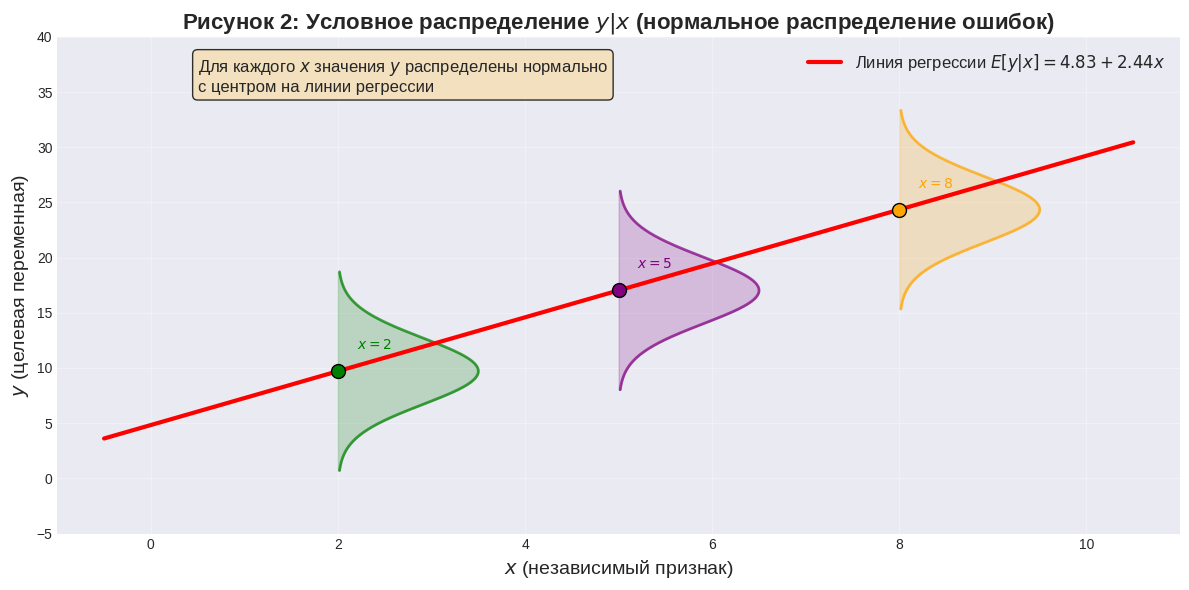

*Рисунок 2 — Для каждого фиксированного значения $x$ целевая переменная $y$ распределена нормально вокруг линии регрессии.*


## 3. Метод максимального правдоподобия (MLE)

Теперь, когда у нас есть вероятностная модель для одного наблюдения, мы можем перейти к оценке параметров по всей выборке. Пусть у нас имеется выборка из $ n $ независимых наблюдений:

$$
D = \{(x^{(i)}, y^{(i)})\}_{i=1}^n.
$$

Предположим, что все наблюдения независимы и одинаково распределены (i.i.d. — independent and identically distributed). Независимость означает, что значение ошибки в одном наблюдении никак не влияет на значение ошибки в другом. Одинаковая распределённость означает, что все они подчиняются одной и той же модели, описанной выше.

Тогда **функция правдоподобия (likelihood function)**, обозначаемая как $L$, представляет собой совместную плотность вероятностей всех наблюдений. В силу независимости, совместная плотность распадается в произведение индивидуальных плотностей:

$$
L(w_0, w_1, \sigma^2) = \prod_{i=1}^{n} p(y^{(i)} \mid x^{(i)}; w_0, w_1, \sigma^2).
$$

Функция правдоподобия отвечает на вопрос: "Насколько правдоподобно (вероятно) наблюдать нашу конкретную выборку данных $D$ при заданных значениях параметров $w_0, w_1, \sigma^2$?".

Подставляя выражение для нормальной плотности, получаем:

$$
L(w_0, w_1, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y^{(i)} - (w_0 + w_1 x^{(i)}))^2}{2\sigma^2} \right).
$$

**Метод максимального правдоподобия (MLE)** заключается в том, чтобы найти такие значения параметров, которые **максимизируют** эту функцию. Иными словами, мы ищем параметры, при которых наблюдать нашу выборку данных было наиболее вероятно.

Работать с произведением большого количества сомножителей неудобно. Для упрощения анализа перейдём к **логарифму функции правдоподобия (log-likelihood)**. Так как логарифм — монотонно возрастающая функция, точка максимума исходной функции и логарифма этой функции совпадают:

$$
\log L(w_0, w_1, \sigma^2) = \log \left( \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y^{(i)} - (w_0 + w_1 x^{(i)}))^2}{2\sigma^2} \right) \right).
$$

Используя свойства логарифма (логарифм произведения равен сумме логарифмов), преобразуем:

$$
\log L(...) = \sum_{i=1}^{n} \log \left[ \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y^{(i)} - (w_0 + w_1 x^{(i)}))^2}{2\sigma^2} \right) \right].
$$

Логарифм произведения множителей внутри квадратных скобок распадается на сумму логарифмов:

$$
= \sum_{i=1}^{n} \left[ \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right) + \log \left( \exp\left( -\frac{(y^{(i)} - (w_0 + w_1 x^{(i)}))^2}{2\sigma^2} \right) \right) \right].
$$

Первый член не зависит от $i$, а второй член упрощается, так как $\log(\exp(z)) = z$:

$$
= \sum_{i=1}^{n} \left[ -\frac{1}{2}\log(2\pi\sigma^2) - \frac{(y^{(i)} - (w_0 + w_1 x^{(i)}))^2}{2\sigma^2} \right].
$$

Теперь мы можем вынести константы за знак суммы. Первое слагаемое $-\frac{1}{2}\log(2\pi\sigma^2)$ одинаково для всех $i$, поэтому:

$$
\log L(w_0, w_1, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y^{(i)} - (w_0 + w_1 x^{(i)}))^2.
$$

Введём важное обозначение — **сумму квадратов ошибок (Sum of Squared Errors, SSE)**:

$$
\text{SSE}(w_0, w_1) = \sum_{i=1}^{n} (y^{(i)} - (w_0 + w_1 x^{(i)}))^2.
$$

Теперь логарифм правдоподобия принимает очень простой и информативный вид:

$$
\log L(w_0, w_1, \sigma^2) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \cdot \text{SSE}(w_0, w_1).
$$

Обозначим первый член, который не зависит от $w_0$ и $w_1$, как константу $C(\sigma^2, n) = -\frac{n}{2} \log(2\pi\sigma^2)$. Тогда:

$$
\log L(w_0, w_1) = C - \frac{1}{2\sigma^2} \cdot \text{SSE}(w_0, w_1).
$$

---

## 4. Переход к минимизации SSE: фундаментальная связь

Полученное выражение — это кульминация нашей теоретической работы. Посмотрим на него внимательно. Константа $C$ не зависит от $w_0$ и $w_1$. Дисперсия ошибок $\sigma^2$ — положительное число, следовательно, множитель $ \frac{1}{2\sigma^2} > 0 $.

Что это означает для задачи оптимизации? Мы хотим найти $\max_{w_0, w_1} \log L(w_0, w_1)$. Но $\log L$ равен константе минус положительное число, умноженное на SSE. Чтобы максимизировать такую величину, нам нужно сделать вычитаемое как можно меньше. А это значит, что нам нужно **минимизировать SSE**.

Более формально, это можно записать так:

$$
\max_{w_0, w_1} \log L(w_0, w_1) \quad \Longleftrightarrow \quad \min_{w_0, w_1} \text{SSE}(w_0, w_1).
$$

Или, показывая роль множителя:

$$
\max_{w_0, w_1} \left( C - \frac{1}{2\sigma^2} \cdot \text{SSE}(w_0, w_1) \right) \quad \Longleftrightarrow \quad \min_{w_0, w_1} \text{SSE}(w_0, w_1).
$$

Строго говоря, точки оптимума (значения $w_0, w_1$), доставляющие максимум логарифму правдоподобия, будут в точности теми же, что и точки, доставляющие минимум сумме квадратов ошибок:

$$
\arg\max_{w_0, w_1} \log L(w_0, w_1) = \arg\min_{w_0, w_1} \text{SSE}(w_0, w_1).
$$

Это и есть **ключевой результат главы**: **максимизация функции правдоподобия при предположении о нормальном распределении ошибок приводит к тому же решению, что и метод наименьших квадратов**. Мы получили строгое статистическое обоснование для, казалось бы, интуитивно понятного критерия качества.

---

## 5. Аналитическое решение метода наименьших квадратов

Теперь, когда мы обосновали необходимость минимизации SSE, мы можем решить эту оптимизационную задачу. Определим функцию потерь (cost function) $J$, которую мы будем минимизировать:

$$
J(w_0, w_1) = \text{SSE}(w_0, w_1) = \sum_{i=1}^{n} (y^{(i)} - (w_0 + w_1 x^{(i)}))^2.
$$

$J$ — это выпуклая квадратичная функция, поэтому она имеет единственный глобальный минимум. Чтобы его найти, вычислим частные производные $ J $ по параметрам и приравняем их к нулю. Это стандартный метод поиска экстремума функции нескольких переменных.

### Производная по $ w_0 $:

Используем правило дифференцирования сложной функции (производная от $(y - w_0 - w_1 x)^2$ по $w_0$ равна $2 \cdot (y - w_0 - w_1 x) \cdot (-1) = -2(y - w_0 - w_1 x)$).

$$
\frac{\partial J}{\partial w_0} = \sum_{i=1}^{n} \left[ -2 \left( y^{(i)} - w_0 - w_1 x^{(i)} \right) \right] = -2 \sum_{i=1}^{n} (y^{(i)} - w_0 - w_1 x^{(i)}).
$$

Приравниваем производную к нулю. Множитель $-2$ можно отбросить, так как он не влияет на решение уравнения $\frac{\partial J}{\partial w_0}=0$:

$$
\sum_{i=1}^{n} (y^{(i)} - w_0 - w_1 x^{(i)}) = 0.
$$

Распишем сумму:

$$
\sum_{i=1}^{n} y^{(i)} - n w_0 - w_1 \sum_{i=1}^{n} x^{(i)} = 0.
$$

Введём обозначения для выборочных средних: $\bar{y} = \frac{1}{n}\sum y^{(i)}$, $\bar{x} = \frac{1}{n}\sum x^{(i)}$. Тогда уравнение принимает вид:

$$
n\bar{y} - n w_0 - w_1 n \bar{x} = 0.
$$

Разделим всё на $n$ и получим первое важное соотношение, связывающее коэффициенты:

$$
\bar{y} = w_0 + w_1 \bar{x} \quad \Rightarrow \quad w_0 = \bar{y} - w_1 \bar{x}. \quad (1)
$$

### Производная по $ w_1 $:

Производная от $(y - w_0 - w_1 x)^2$ по $w_1$ равна $2 \cdot (y - w_0 - w_1 x) \cdot (-x) = -2x(y - w_0 - w_1 x)$.

$$
\frac{\partial J}{\partial w_1} = \sum_{i=1}^{n} \left[ -2 x^{(i)} \left( y^{(i)} - w_0 - w_1 x^{(i)} \right) \right] = -2 \sum_{i=1}^{n} x^{(i)}(y^{(i)} - w_0 - w_1 x^{(i)}).
$$

Приравниваем к нулю, отбрасывая $-2$:

$$
\sum_{i=1}^{n} x^{(i)}(y^{(i)} - w_0 - w_1 x^{(i)}) = 0. \quad (2)
$$

Теперь подставим выражение для $w_0$ из (1) в уравнение (2):

$$
\sum_{i=1}^{n} x^{(i)} \left( y^{(i)} - (\bar{y} - w_1 \bar{x}) - w_1 x^{(i)} \right) = 0.
$$

Перегруппируем слагаемые внутри скобки:

$$
\sum_{i=1}^{n} x^{(i)} \left( (y^{(i)} - \bar{y}) - w_1 (x^{(i)} - \bar{x}) \right) = 0.
$$

Раскроем скобки, распределив сумму:

$$
\sum_{i=1}^{n} x^{(i)} (y^{(i)} - \bar{y}) - w_1 \sum_{i=1}^{n} x^{(i)} (x^{(i)} - \bar{x}) = 0.
$$

Выразим $w_1$:

$$
w_1 = \frac{ \sum_{i=1}^{n} x^{(i)} (y^{(i)} - \bar{y}) }{ \sum_{i=1}^{n} x^{(i)} (x^{(i)} - \bar{x}) }.
$$

Эту формулу можно привести к более симметричному и удобному для вычислений виду, используя тождество $\sum x^{(i)}(y^{(i)} - \bar{y}) = \sum (x^{(i)} - \bar{x})(y^{(i)} - \bar{y})$ и аналогично для знаменателя. Получаем классическую формулу для коэффициента наклона:

$$
\boxed{ w_1 = \frac{ \sum_{i=1}^{n} (x^{(i)} - \bar{x})(y^{(i)} - \bar{y}) }{ \sum_{i=1}^{n} (x^{(i)} - \bar{x})^2 } }.
$$

А значение $ w_0 $ находится по ранее выведенной формуле:

$$
\boxed{ w_0 = \bar{y} - w_1 \bar{x} }.
$$

Эти выражения и есть **аналитическое решение задачи простой линейной регрессии методом наименьших квадратов**. Они позволяют вычислить оптимальные коэффициенты напрямую, без использования итеративных алгоритмов.

---

## 6. 🧭 Градиентный спуск: численный метод оптимизации

Несмотря на существование аналитического решения, на практике (особенно в задачах машинного обучения с большим количеством признаков) оно используется редко. Причина в вычислительной сложности: обращение матриц (к которому сводится решение для многомерного случая) требует $O(n^3)$ операций, что неприемлемо для данных с тысячами признаков.

В таких случаях применяют итеративный численный метод — **градиентный спуск (Gradient Descent)**.

### Идея метода:
Представим, что мы находимся на поверхности функции потерь $J(w_0, w_1)$, которая представляет собой "холм" или "овраг". Наша цель — спуститься на дно самого глубокого оврага (в глобальный минимум). Градиент функции в каждой точке показывает направление самого крутого **подъёма**. Следовательно, чтобы спуститься, мы должны двигаться в направлении, противоположном градиенту — **антиградиенту**.

Вектор градиента составляется из частных производных:

$$
\nabla_w J(w_0, w_1) = \begin{bmatrix}
\frac{\partial J}{\partial w_0} \\[1em]
\frac{\partial J}{\partial w_1}
\end{bmatrix}.
$$

Мы уже вычислили эти производные ранее (без множителя -2, так как для градиента важнее направление, но для корректности шага мы его оставим):

$$
\frac{\partial J}{\partial w_0} = -2 \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})
$$
$$
\frac{\partial J}{\partial w_1} = -2 \sum_{i=1}^{n} x^{(i)} (y^{(i)} - \hat{y}^{(i)}),
$$

где мы ввели предсказание модели $\hat{y}^{(i)} = w_0 + w_1 x^{(i)}$ и ошибку $e^{(i)} = y^{(i)} - \hat{y}^{(i)}$.

### Правило обновления весов:

На каждом шаге $t$ мы обновляем веса, делая небольшой шаг в направлении антиградиента. Размер шага контролируется параметром $\alpha > 0$, который называется **скоростью обучения (learning rate)**.

$$
\begin{aligned}
w_0^{(t+1)} &:= w_0^{(t)} - \alpha \cdot \frac{\partial J}{\partial w_0} \\
w_1^{(t+1)} &:= w_1^{(t)} - \alpha \cdot \frac{\partial J}{\partial w_1}
\end{aligned}
$$

Подставим выражения для производных:

$$
\begin{aligned}
w_0^{(t+1)} &:= w_0^{(t)} - \alpha \cdot \left( -2 \sum_{i=1}^{n} e^{(i)} \right) = w_0^{(t)} + 2\alpha \sum_{i=1}^{n} e^{(i)} \\
w_1^{(t+1)} &:= w_1^{(t)} - \alpha \cdot \left( -2 \sum_{i=1}^{n} x^{(i)} e^{(i)} \right) = w_1^{(t)} + 2\alpha \sum_{i=1}^{n} x^{(i)} e^{(i)}.
\end{aligned}
$$

Это формулы для **пакетного градиентного спуска (batch gradient descent)**, где на каждом шаге мы вычисляем градиент по всей обучающей выборке. Существуют также стохастические и мини-пакетные версии, которые используют для обновления одно или несколько случайных наблюдений, что ускоряет сходимость на очень больших данных.

---

## 7. Связь между SSE и MSE

В литературе и на практике для оценки качества регрессионных моделей используются две тесно связанные метрики.

### 1. **Сумма квадратов ошибок (SSE)**
Как мы уже знаем:
$$
\text{SSE} = \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2.
$$
Основное свойство SSE: она растёт с увеличением количества наблюдений $n$. Если мы добавим в выборку новые точки, SSE, скорее всего, увеличится, даже если модель не стала хуже. Это делает SSE неудобной для сравнения моделей на выборках разного размера.

### 2. **Среднеквадратическая ошибка (MSE)**
Чтобы избавиться от зависимости от $n$, используют MSE — сумму квадратов ошибок, делённую на количество наблюдений:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2 = \frac{\text{SSE}}{n}.
$$

MSE показывает среднеквадратичную ошибку модели на одно наблюдение. Именно MSE чаще всего фигурирует в отчётах о качестве моделей, так как позволяет сравнивать модели, обученные на разных по размеру датасетах.

### Важное замечание об оптимизации:
Из соотношения $\text{MSE} = \text{SSE} / n$ следует, что умножение функции на положительную константу ($1/n$) не меняет положение точки минимума:

$$
\arg\min \text{SSE}(w_0, w_1) = \arg\min \text{MSE}(w_0, w_1).
$$

Это означает, что, решая задачу минимизации SSE, мы автоматически решаем задачу минимизации MSE, и наоборот. Поэтому в теоретических выкладках удобно использовать SSE (так как избавляет от лишних дробей), а в практических сравнениях — MSE.


## Заключение

В этой главе мы проделали важный путь от интуитивного представления о линейной зависимости к строгой математической модели. Мы установили, что широко используемый **метод наименьших квадратов (МНК)** не является просто чьей-то удачной догадкой. Он имеет глубокое статистическое обоснование через **метод максимального правдоподобия (MLE)** при ключевом предположении о **нормальном распределении ошибок модели**.

Мы вывели аналитические формулы для расчёта коэффициентов регрессии, а также познакомились с численным методом их поиска — градиентным спуском, который лежит в основе современных библиотек машинного обучения. Понимание этой связи между вероятностной моделью, функцией правдоподобия и функцией потерь является фундаментом для дальнейшего изучения как более сложных регрессионных методов (например, гребневой или лассо-регрессии), так и для понимания классификационных алгоритмов.


# 🧮 Матричный подход в линейной регрессии

## 1. Запись модели в матричном виде

Рассмотрим простую линейную регрессию:

$$
y_i = w_0 + w_1 x_i + \varepsilon_i, \quad i = 1, 2, ..., n.
$$

Эти уравнения можно объединить в одну **матричную форму**:

$$
Y = Xw + \varepsilon,
$$

где:
- $ Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} $ — вектор наблюдений целевой переменной размерности $n \times 1$;
- $ X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} $ — матрица признаков размерности $n \times 2$, первый столбец которой состоит из единиц для учёта свободного члена $w_0$;
- $ w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $ — вектор параметров модели размерности $2 \times 1$;
- $ \varepsilon = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix} $ — вектор случайных ошибок размерности $n \times 1$.

Модель в таком виде позволяет нам использовать мощные инструменты линейной алгебры для оценки параметров и анализа свойств регрессии.



## 2. Связь с ранее найденными уравнениями

Напомним, что система нормальных уравнений для метода наименьших квадратов имеет вид:

1. $\sum y_i = n w_0 + w_1 \sum x_i$
2. $\sum x_i y_i = w_0 \sum x_i + w_1 \sum x_i^2$

Теперь покажем, как эти уравнения можно получить в матричной форме.

### Вычислим $X^T X$:

$$
X^T X =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
=
\begin{bmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i^2
\end{bmatrix}
$$

### Теперь вычислим $X^T Y$:

$$
X^T Y =
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1 & x_2 & \cdots & x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
\sum y_i \\
\sum x_i y_i
\end{bmatrix}
$$



## 3. Вывод решения через псевдообратную матрицу

Систему нормальных уравнений можно записать в общем виде:

$$
X^T X w = X^T Y
$$

Если матрица $X^T X$ невырожденная (т.е. её определитель не равен нулю), то она обратима, и мы можем найти решение:

$$
w = (X^T X)^{-1} X^T Y
$$

Это — **аналитическое решение задачи линейной регрессии** в матричной форме.



## 4. Интерпретация компонентов

- $w$ — вектор оценок коэффициентов модели ($2 \times 1$);
- $X$ — матрица факторов ($n \times 2$);
- $Y$ — вектор откликов ($n \times 1$);
- $X^T$ — транспонированная матрица $X$;
- $(X^T X)^{-1}$ — обратная матрица размерности $2 \times 2$.



## ✅ Пример

Пусть даны следующие данные:

| i | $x_i$ | $y_i$ |
|---|--------|--------|
| 1 |   1    |   3    |
| 2 |   2    |   5    |
| 3 |   3    |   7    |

Тогда:

$$
X = \begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}, \quad
Y = \begin{bmatrix}
3 \\
5 \\
7
\end{bmatrix}
$$

Вычислим:

$$
X^T X =
\begin{bmatrix}
3 & 6 \\
6 & 14
\end{bmatrix}, \quad
X^T Y =
\begin{bmatrix}
15 \\
38
\end{bmatrix}
$$

Найдём обратную матрицу:

$$
(X^T X)^{-1} =
\frac{1}{6} \begin{bmatrix}
14 & -6 \\
-6 & 3
\end{bmatrix}
=
\begin{bmatrix}
\frac{7}{3} & -1 \\
-1 & \frac{1}{2}
\end{bmatrix}
$$

Теперь вычислим:

$$
w = (X^T X)^{-1} X^T Y =
\begin{bmatrix}
1 \\
2
\end{bmatrix}
$$

Таким образом, модель: $y = 1 + 2x$ — действительно наилучшая прямая для этих данных.



## 📌 Итог

Матричная форма линейной регрессии позволяет:

- унифицировать обработку данных;
- эффективно решать задачи даже с большим количеством признаков;
- использовать численные библиотеки (NumPy, SciPy и др.) для расчётов.

Аналитическое решение:

$$
w = (X^T X)^{-1} X^T Y
$$

предоставляет точное значение вектора параметров, если матрица $X^T X$ невырожденная. Это — мощный инструмент, который лежит в основе множества современных алгоритмов машинного обучения.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


class SimpleLinearRegression:
    def __init__(self):
        self.w_analytic = None  # Аналитические веса
        self.w_gd = None        # Веса градиентного спуска
        self.w_sklearn = None   # Веса от sklearn
        self.loss_history = []  # История ошибок при обучении

    def generate_data(self, n_samples=100, noise=5, seed=42):
        """Сгенерируйте данные с шумом"""
        np.random.seed(seed)
        X = np.linspace(0, 10, n_samples).reshape(-1, 1)
        y = 2 * X.flatten() + 5 + np.random.normal(0, noise, X.shape[0])
        return X, y

    def split_data(self, X, y, test_size=0.2, val_size=0.2, random_state=42):
        """Разделите данные на обучающую, валидационную и тестовую выборки"""
        X_train, X_temp, y_train, y_temp = train_test_split(
            X, y, test_size=test_size + val_size, random_state=random_state
        )
        val_ratio = val_size / (test_size + val_size)
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=test_size, random_state=random_state
        )
        return X_train, X_val, X_test, y_train, y_val, y_test

    def add_bias_term(self, X):
        """Добавьте столбец единиц для свободного члена"""
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def analytic_solution(self, X, y):
        """Аналитическое решение методом наименьших квадратов"""
        X_b = self.add_bias_term(X)
        self.w_analytic = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

    def gradient_descent(self, X, y, X_val, y_val,
                         alpha=0.01, max_iter=1000, tol=1e-4, patience=10):
        """Градиентный спуск с early stopping по MSE на валидации"""
        X_b = self.add_bias_term(X)
        w = np.zeros(X_b.shape[1])
        best_w = w.copy()
        best_val_loss = float('inf')
        no_improvement_count = 0

        for i in range(max_iter):
            y_pred = X_b @ w
            error = y_pred - y
            grad = 2 * X_b.T @ error / len(y)

            w -= alpha * grad

            # Оценка на валидации
            val_pred = self._predict_with_weights(X_val, w)
            val_loss = mean_squared_error(y_val, val_pred)
            self.loss_history.append(val_loss)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_w = w.copy()
                no_improvement_count = 0
            else:
                no_improvement_count += 1

            if no_improvement_count >= patience:
                print(f"Early stopping на итерации {i}")
                break

        self.w_gd = best_w

    def _predict_with_weights(self, X, w):
        """Предсказание с заданными весами"""
        X_b = self.add_bias_term(X)
        return X_b @ w

    def fit_sklearn(self, X, y):
        """Обучение с помощью sklearn"""
        model = LinearRegression()
        model.fit(X, y)
        self.w_sklearn = np.array([model.intercept_, model.coef_[0]])

    def predict(self, X, method='analytic'):
        """Предсказание по выбранному методу"""
        if method == 'analytic':
            return self._predict_with_weights(X, self.w_analytic)
        elif method == 'gd':
            return self._predict_with_weights(X, self.w_gd)
        elif method == 'sklearn':
            return self._predict_with_weights(X, self.w_sklearn)
        else:
            raise ValueError("Метод должен быть 'analytic', 'gd' или 'sklearn'")

    def evaluate(self, X, y, method='analytic'):
        """Оценка качества модели на тестовых данных"""
        y_pred = self.predict(X, method)
        mse = mean_squared_error(y, y_pred)
        return mse

    def plot_regression(self, X, y, methods=['analytic', 'gd', 'sklearn']):
        """Визуализация результатов регрессии"""
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='gray', label='Данные')

        x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        for method in methods:
            y_line = self.predict(x_line, method)
            plt.plot(x_line, y_line, label=f'{method.capitalize()} модель')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Сравнение моделей линейной регрессии')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_loss(self):
        """Визуализация истории ошибок при градиентном спуске"""
        plt.figure(figsize=(8, 4))
        plt.plot(self.loss_history, label='Validation Loss (GD)')
        plt.xlabel('Итерация')
        plt.ylabel('MSE')
        plt.title('Loss во время обучения (градиентный спуск)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_predictions_on_new_data(self, X_train, y_train, X_new, methods=['analytic', 'gd', 'sklearn']):
        """Визуализация предсказаний на новых точках"""
        plt.figure(figsize=(10, 6))
        plt.scatter(X_train, y_train, color='gray', label='Обучающие данные')
        plt.scatter(X_new, self.predict(X_new, method='analytic'), color='red', label='Новые точки (pred)', zorder=5)

        x_line = np.linspace(min(np.min(X_train), np.min(X_new)), max(np.max(X_train), np.max(X_new)), 100).reshape(-1, 1)

        for method in methods:
            y_line = self.predict(x_line, method)
            plt.plot(x_line, y_line, label=f'{method.capitalize()} модель')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Предсказания на новых данных')
        plt.legend()
        plt.grid(True)
        plt.show()


# === Пример использования ===
if __name__ == "__main__":
    model = SimpleLinearRegression()

    # Генерация данных
    X, y = model.generate_data(n_samples=200, noise=5)

    # Разделение на обучающую, валидационную и тестовую выборки
    X_train, X_val, X_test, y_train, y_val, y_test = model.split_data(X, y)

    # Обучение моделей
    model.analytic_solution(X_train, y_train)
    model.gradient_descent(X_train, y_train, X_val, y_val, alpha=0.01, max_iter=1000)
    model.fit_sklearn(X_train, y_train)

    # Оценка
    print("MSE (аналитика):", model.evaluate(X_test, y_test, method='analytic'))
    print("MSE (градиентный спуск):", model.evaluate(X_test, y_test, method='gd'))
    print("MSE (sklearn):", model.evaluate(X_test, y_test, method='sklearn'))

    # Визуализация
    model.plot_regression(X_test, y_test)
    model.plot_loss()

    # Тестирование на новые данные
    X_new = np.array([[11], [12], [13]])
    print("\nПредсказания на новых данных:")
    print("Аналитика:", model.predict(X_new, method='analytic'))
    print("Градиентный спуск:", model.predict(X_new, method='gd'))
    print("Sklearn:", model.predict(X_new, method='sklearn'))

    # Визуализация предсказаний на новых данных
    model.plot_predictions_on_new_data(X_train, y_train, X_new)